In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #01 - Function Fitting

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using function fitting.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
import math

In [3]:
### Read in observations ###
initial = np.loadtxt("RAOBs_201903131200.txt", delimiter = ",", dtype  = str)
data = initial[:,1:].astype(float)
heights = data[:,2]

In [4]:
data_lat=data[:,0]
data_lon=data[:,1]

sigma = (1+np.sin(np.radians(60)))/(1+np.sin(np.radians(data_lat)))

data_x = sigma*6371000*np.cos(np.radians(data_lat))*np.cos(np.radians(data_lon+115)) / (15000000)
data_y = sigma*6371000*np.cos(np.radians(data_lat))*np.sin(np.radians(data_lon+115)) / (15000000)


In [5]:
x = np.arange(22)
y = np.arange(28)

delta = 1.27
x0 = 18.9
y0 = -6.3

x = x0+(x*delta)
y = y0 + (y*delta)

x_grid,y_grid = np.meshgrid(x,y)

# gird x y coords in m
x_grid = x_grid/100
y_grid = y_grid/100

In [6]:
radius = (10 / 100)

In [7]:
#get data within the defined radius
points_in_radius=np.zeros(x_grid.shape)
x_fin=np.zeros(x_grid.shape)
y_fin=np.zeros(x_grid.shape)
z_fin=np.zeros(x_grid.shape)
foo = []
for i in range(len(x_grid)):
    for j in range(len(x_grid[i])):
        distances = ( (x_grid[i,j]-data_x)**2 + (y_grid[i,j]-data_y)**2 )**0.5
        x_dist = x_grid[i,j]-data_x
        y_dist = y_grid[i,j]-data_y
        points_in_radius[i,j]=np.count_nonzero(distances<=radius)
        x_fin[i,j] = np.mean(x_dist[np.where(distances<=radius)])
        y_fin[i,j] = np.mean(y_dist[np.where(distances<=radius)])
        z_fin[i,j] = np.mean(heights[np.where(distances<=radius)])
        xk = x_dist[np.where(distances<=radius)]
        yk = y_dist[np.where(distances<=radius)]
        z  = heights[np.where(distances<=radius)]
        thingy = {"i":i,"j":j, "xk" : xk, "yk" : yk, "z": z}
        foo.append(thingy)

        


In [8]:
#lord forgive me for I have sinned
x_bar = []
y_bar = []
z_bar = []
x2    = []
y2    = []
xy    = []
x3    = []
xy2   = []
x2y   = []
y3    = []
x4    = []
x2y2  = []
x3y   = []
y4    = []
xy3   = []
xz    = []
yz    = []
x2z   = []
y2z   = []
xyz   = []
for i in range(len(foo)):
    x_bar.append(np.mean(foo[i]["xk"]))
    y_bar.append(np.mean(foo[i]["yk"]))
    z_bar.append(np.mean(foo[i]["z"]))
    x2.append(np.mean(foo[i]["xk"]**2))
    y2.append(np.mean((foo[i]["yk"]**2)))
    xy.append(np.mean(foo[i]["xk"]*foo[i]["yk"]))
    x3.append(np.mean(foo[i]["xk"]**3))
    xy2.append(np.mean(foo[i]["xk"]*(foo[i]["yk"]**2)))
    x2y.append(np.mean((foo[i]["xk"]**2)*foo[i]["yk"]))
    y3.append(np.mean(foo[i]["yk"]**3))
    x4.append(np.mean(foo[i]["xk"]**4))
    x2y2.append(np.mean((foo[i]["xk"]**2)*(foo[i]["yk"]**2)))
    x3y.append(np.mean((foo[i]["xk"]**3)*foo[i]["yk"]))
    y4.append(np.mean((foo[i]["yk"]**4)))
    xy3.append(np.mean((foo[i]["xk"])*(foo[i]["yk"]**3)))
    xz.append(np.mean(foo[i]["xk"]*foo[i]["z"]))
    yz.append(np.mean(foo[i]["yk"]*foo[i]["z"]))
    x2z.append(np.mean((foo[i]["xk"]**2)*foo[i]["z"]))
    y2z.append(np.mean((foo[i]["yk"]**2)*foo[i]["z"]))
    xyz.append(np.mean(foo[i]["xk"]*foo[i]["yk"]*foo[i]["z"]))
    

In [9]:
# resahpe to make my brian happy
x_bar = np.array(x_bar).reshape(28,22)
y_bar = np.array(y_bar).reshape(28,22)
z_bar = np.array(z_bar).reshape(28,22)
x2    = np.array(x2).reshape(28,22)
y2    = np.array(y2).reshape(28,22)
xy    = np.array(xy).reshape(28,22)
x3    = np.array(x3).reshape(28,22)
xy2   = np.array(xy2).reshape(28,22)
x2y   = np.array(x2y).reshape(28,22)
y3    = np.array(y3).reshape(28,22)
x4    = np.array(x4).reshape(28,22)
x2y2  = np.array(x2y2).reshape(28,22)
x3y   = np.array(x3y).reshape(28,22)
y4    = np.array(y4).reshape(28,22)
xy3   = np.array(xy3).reshape(28,22)
xz    = np.array(xz).reshape(28,22)
yz    = np.array(yz).reshape(28,22)
x2z   = np.array(x2z).reshape(28,22)
y2z   = np.array(y2z).reshape(28,22)
xyz   = np.array(xyz).reshape(28,22)

In [10]:
# left hand side matrix
mat = np.array([[np.ones((28,22)), x_bar, y_bar, x2 , y2, xy],
       [x_bar, x2, xy, x3, xy2,x2y],
       [y_bar, xy, y2, x2y, y3, xy2],
       [x2, x3, x2y, x4, x2y2, x3y],
       [y2, xy2, y3, x2y2, y4, xy3],
       [xy, x2y, xy2, x3y, xy3, x2y2]])


In [11]:
#right hand side matrix
mat2= np.array([[z_bar],
                [xz],
                [yz],
                [x2z],
                [y2z],
                [xyz]])


In [12]:
# Reshape hehe
mat_reshaped = mat.reshape(6, 6, -1) 
mat2_reshaped = mat2.reshape(6, 1, -1)  


result = np.empty((6, 1, 28, 22))


for i in range(mat_reshaped.shape[2]):  
    mat_slice = mat_reshaped[:, :, i]
    

    if np.linalg.det(mat_slice) != 0:
        mat_inv = np.linalg.inv(mat_slice)  
    else:
        mat_inv = np.linalg.pinv(mat_slice)  
    
    result_reshaped = mat_inv @ mat2_reshaped[:, :, i]  
    
    
    result[:, :, i // 22, i % 22] = result_reshaped


analysis=np.squeeze(np.array(result[0]))


In [13]:
m=1/15000000
tan = ((((x_grid/m)**2)+((y_grid/m)**2))**(1/2))/(6371000*(1+math.cos(math.radians(90-60))))
lat = np.degrees((np.pi/2)-(2*np.arctan(tan)))
lon= np.degrees(np.arctan(y_grid/x_grid)) - 115



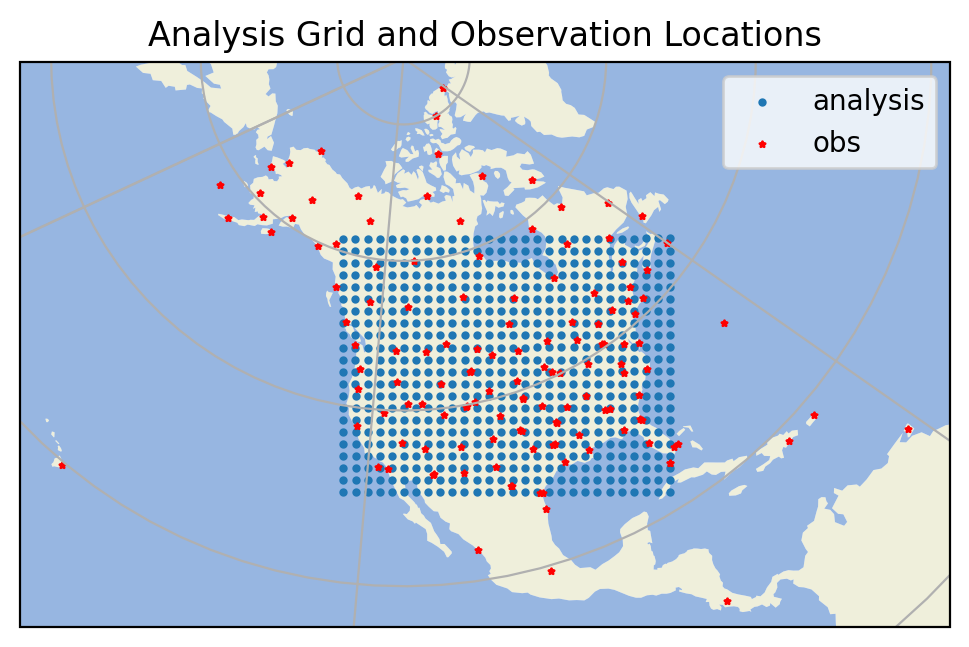

In [14]:
### Set up analysis map with a 22x28 rectangular grid of points ###

fig = plt.figure(figsize=(6,6),dpi=200)
proj = ccrs.Stereographic(central_longitude=-115, central_latitude=90, true_scale_latitude=60)
ax = fig.add_subplot(1,1,1, projection = proj)
ax.scatter(lon,lat,transform=ccrs.PlateCarree(), s = 4, label  = 'analysis')
ax.scatter(data_lon,data_lat,transform=ccrs.PlateCarree(),color='red', marker='*',s=4, label = "obs")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.gridlines()
ax.legend()
plt.title('Analysis Grid and Observation Locations')
plt.show()



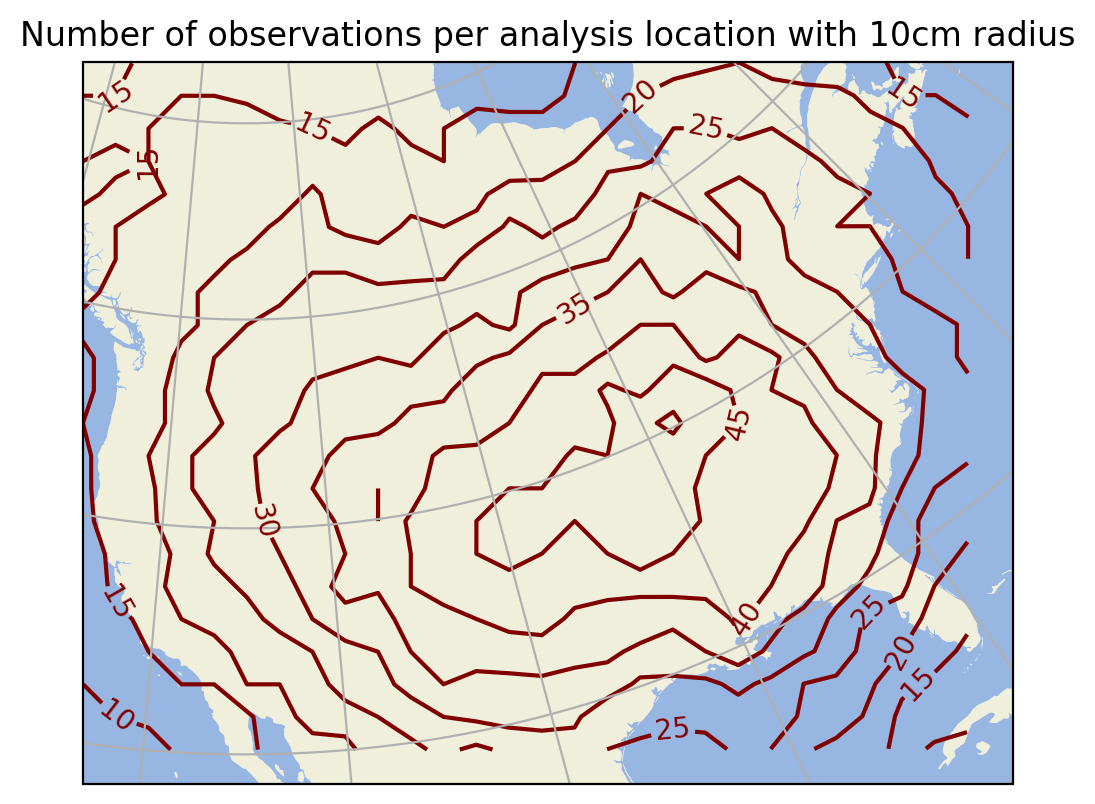

In [15]:
fig = plt.figure(figsize=(6,6),dpi=200)
proj = ccrs.Stereographic(central_longitude=-115, central_latitude=90, true_scale_latitude=60)
ax = fig.add_subplot(1,1,1, projection = proj)
cs = ax.contour(lon,lat,points_in_radius,transform=ccrs.PlateCarree(),levels= np.arange(0,200,5), colors='maroon')
ax.clabel(cs, inline=1, fontsize=10) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.gridlines()
plt.title("Number of observations per analysis location with 10cm radius")
plt.savefig('10cm_station_number')
plt.show()

file = open("10cm_radius_points", "w+")
 
# Saving the array in a text file
content = str(points_in_radius)
file.write(content)
file.close()


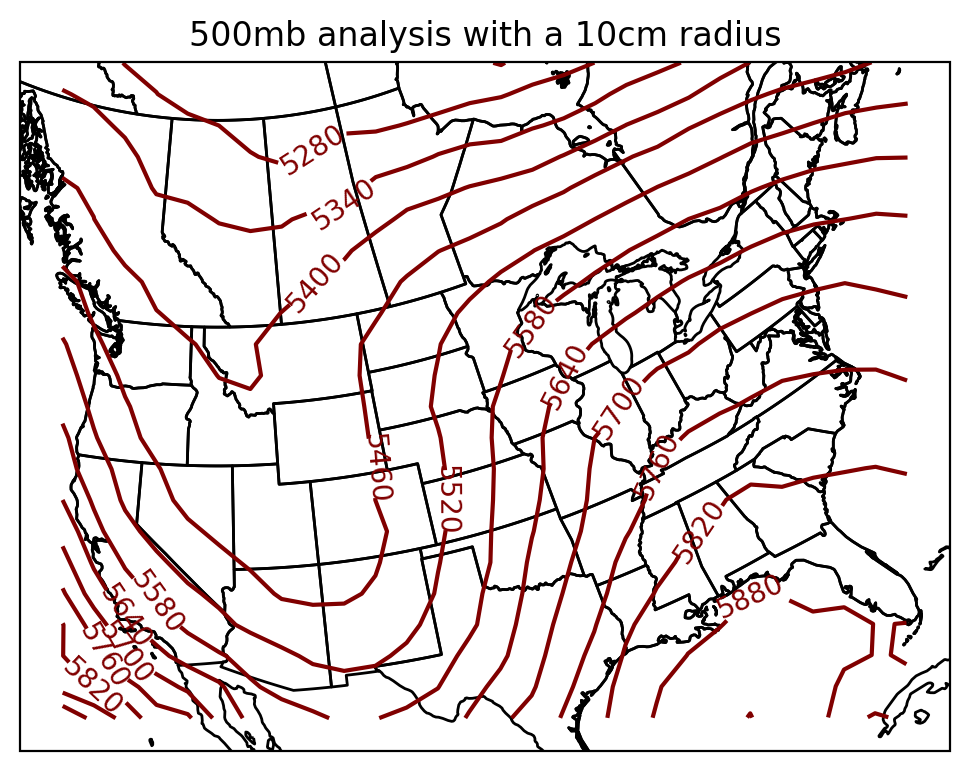

In [16]:
### Plot 500mb analyses over a map ###
#convert analysis x,y to lat/lon#


proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(6,6),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(lon,lat,analysis,colors='maroon',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.title("500mb analysis with a 10cm radius")
plt.savefig('10cm_analysis')
plt.show()

file = open("10cm_analysis", "w+")
 
#Saving the array in a text file
content = str(analysis)
file.write(content)
file.close()

In [17]:
radius = (20 / 100)

points_in_radius=np.zeros(x_grid.shape)
x_fin=np.zeros(x_grid.shape)
y_fin=np.zeros(x_grid.shape)
z_fin=np.zeros(x_grid.shape)
foo = []
for i in range(len(x_grid)):
    for j in range(len(x_grid[i])):
        distances = ( (x_grid[i,j]-data_x)**2 + (y_grid[i,j]-data_y)**2 )**0.5
        x_dist = x_grid[i,j]-data_x
        y_dist = y_grid[i,j]-data_y
        points_in_radius[i,j]=np.count_nonzero(distances<=radius)
        x_fin[i,j] = np.mean(x_dist[np.where(distances<=radius)])
        y_fin[i,j] = np.mean(y_dist[np.where(distances<=radius)])
        z_fin[i,j] = np.mean(heights[np.where(distances<=radius)])
        xk = x_dist[np.where(distances<=radius)]
        yk = y_dist[np.where(distances<=radius)]
        z  = heights[np.where(distances<=radius)]
        thingy = {"i":i,"j":j, "xk" : xk, "yk" : yk, "z": z}
        foo.append(thingy)

x_bar = []
y_bar = []
z_bar = []
x2    = []
y2    = []
xy    = []
x3    = []
xy2   = []
x2y   = []
y3    = []
x4    = []
x2y2  = []
x3y   = []
y4    = []
xy3   = []
xz    = []
yz    = []
x2z   = []
y2z   = []
xyz   = []
for i in range(len(foo)):
    x_bar.append(np.mean(foo[i]["xk"]))
    y_bar.append(np.mean(foo[i]["yk"]))
    z_bar.append(np.mean(foo[i]["z"]))
    x2.append(np.mean(foo[i]["xk"]**2))
    y2.append(np.mean((foo[i]["yk"]**2)))
    xy.append(np.mean(foo[i]["xk"]*foo[i]["yk"]))
    x3.append(np.mean(foo[i]["xk"]**3))
    xy2.append(np.mean(foo[i]["xk"]*(foo[i]["yk"]**2)))
    x2y.append(np.mean((foo[i]["xk"]**2)*foo[i]["yk"]))
    y3.append(np.mean(foo[i]["yk"]**3))
    x4.append(np.mean(foo[i]["xk"]**4))
    x2y2.append(np.mean((foo[i]["xk"]**2)*(foo[i]["yk"]**2)))
    x3y.append(np.mean((foo[i]["xk"]**3)*foo[i]["yk"]))
    y4.append(np.mean((foo[i]["yk"]**4)))
    xy3.append(np.mean((foo[i]["xk"])*(foo[i]["yk"]**3)))
    xz.append(np.mean(foo[i]["xk"]*foo[i]["z"]))
    yz.append(np.mean(foo[i]["yk"]*foo[i]["z"]))
    x2z.append(np.mean((foo[i]["xk"]**2)*foo[i]["z"]))
    y2z.append(np.mean((foo[i]["yk"]**2)*foo[i]["z"]))
    xyz.append(np.mean(foo[i]["xk"]*foo[i]["yk"]*foo[i]["z"]))
    


x_bar = np.array(x_bar).reshape(28,22)
y_bar = np.array(y_bar).reshape(28,22)
z_bar = np.array(z_bar).reshape(28,22)
x2    = np.array(x2).reshape(28,22)
y2    = np.array(y2).reshape(28,22)
xy    = np.array(xy).reshape(28,22)
x3    = np.array(x3).reshape(28,22)
xy2   = np.array(xy2).reshape(28,22)
x2y   = np.array(x2y).reshape(28,22)
y3    = np.array(y3).reshape(28,22)
x4    = np.array(x4).reshape(28,22)
x2y2  = np.array(x2y2).reshape(28,22)
x3y   = np.array(x3y).reshape(28,22)
y4    = np.array(y4).reshape(28,22)
xy3   = np.array(xy3).reshape(28,22)
xz    = np.array(xz).reshape(28,22)
yz    = np.array(yz).reshape(28,22)
x2z   = np.array(x2z).reshape(28,22)
y2z   = np.array(y2z).reshape(28,22)
xyz   = np.array(xyz).reshape(28,22)


In [18]:
mat = np.array([[np.ones((28,22)), x_bar, y_bar, x2 , y2, xy],
       [x_bar, x2, xy, x3, xy2,x2y],
       [y_bar, xy, y2, x2y, y3, xy2],
       [x2, x3, x2y, x4, x2y2, x3y],
       [y2, xy2, y3, x2y2, y4, xy3],
       [xy, x2y, xy2, x3y, xy3, x2y2]])

mat2= np.array([[z_bar],
                [xz],
                [yz],
                [x2z],
                [y2z],
                [xyz]])


In [19]:
mat_reshaped = mat.reshape(6, 6, -1) 
mat2_reshaped = mat2.reshape(6, 1, -1)  


result = np.empty((6, 1, 28, 22))


for i in range(mat_reshaped.shape[2]):  
    mat_slice = mat_reshaped[:, :, i]
    

    if np.linalg.det(mat_slice) != 0:
        mat_inv = np.linalg.inv(mat_slice)  
    else:
        mat_inv = np.linalg.pinv(mat_slice)  
    
    result_reshaped = mat_inv @ mat2_reshaped[:, :, i]  
    
    
    result[:, :, i // 22, i % 22] = result_reshaped

analysis=np.squeeze(np.array(result[0]))

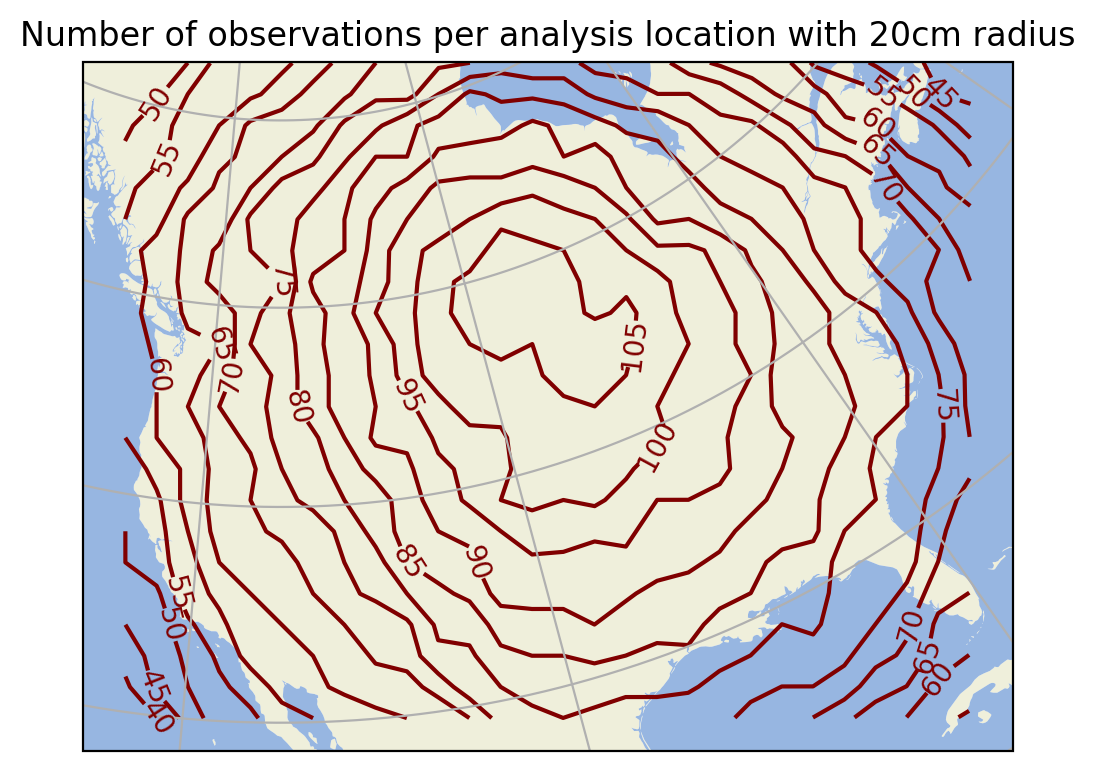

In [20]:
fig = plt.figure(figsize=(6,6),dpi=200)
proj = ccrs.Stereographic(central_longitude=-115, central_latitude=90, true_scale_latitude=60)
ax = fig.add_subplot(1,1,1, projection = proj)
cs = ax.contour(lon,lat,points_in_radius,transform=ccrs.PlateCarree(),levels= np.arange(0,200,5),colors='maroon')
ax.clabel(cs, inline=1, fontsize=10) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.gridlines()
plt.title("Number of observations per analysis location with 20cm radius")
plt.savefig('20cm_station_number')
plt.show()

file = open("20cm_radius_points", "w+")
 
# Saving the array in a text file
content = str(points_in_radius)
file.write(content)
file.close()


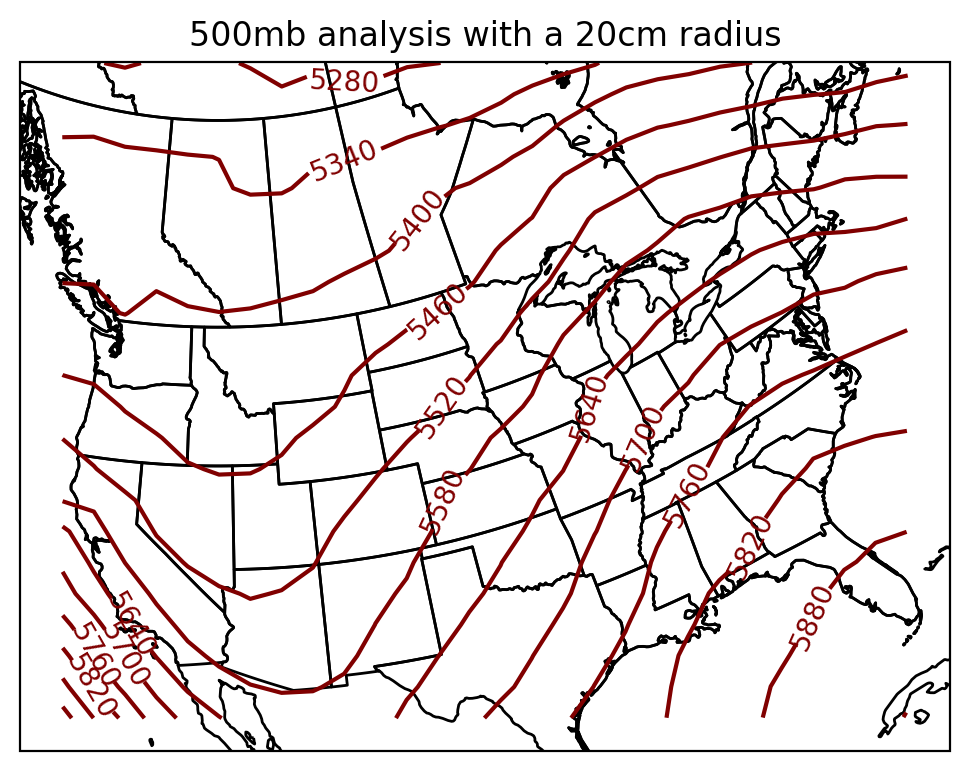

In [21]:


proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(6,6),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(lon,lat,analysis,colors='maroon',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.title("500mb analysis with a 20cm radius")
#plt.savefig('20cm_analysis')
plt.show()

file = open("20cm_analysis", "w+")
 
# Saving the array in a text file
content = str(analysis)
file.write(content)
file.close()

In [22]:
### Store the number of observations available for each grid point in text files ###



In [23]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.
    There is a major trough located over the intermountian west, stretching to the desert southwest. 

2 - Describe the differences that you see in your contoured analyses.  
    Does one analysis seem to be smoother than the other?  If so, what would cause this?

    
3 - Run your program using a radius of influence of 6 cm (do not need to show).  
    Describe the results - do they look realistic?  If there are problems, what
    do you think might be causing them?

    
4 - Suppose you ran this program with a small enough radius of influence that only one
    observation was available for determining a polynomial fit at a grid point.  Should
    you be able to perform the matrix inversion?  Why or why not?

    

'''

'\n1 - Describe the general features that you see in your contoured analyses.\n    There is a major trough located over the intermountian west, stretching to the desert southwest. \n\n2 - Describe the differences that you see in your contoured analyses.  \n    Does one analysis seem to be smoother than the other?  If so, what would cause this?\n\n    \n3 - Run your program using a radius of influence of 6 cm (do not need to show).  \n    Describe the results - do they look realistic?  If there are problems, what\n    do you think might be causing them?\n\n    \n4 - Suppose you ran this program with a small enough radius of influence that only one\n    observation was available for determining a polynomial fit at a grid point.  Should\n    you be able to perform the matrix inversion?  Why or why not?\n\n    \n\n'

1. There is a major trough located over the intermountian west, stretching to the desert southwest. On the 10 cm analysis the trough is digging much depper into New Mexico and Texas. The trough also appears to have a slight negative tilt in to 10 cm analysis. At 20cm, the trough is digging less and is less amplified. The trough also appears to have a more neutral tilt in this analysis. There also appears to be some slight ridgring occuring over the southeast US in both the 20cm and 10cm analysis.

2. The 10 cm analysis is much more jagged in some areas such as off the coast of Florida as well as over Montana and Idaho. The 20cm analysis is more smooth in some areas like near Florida off the coast of California. The smoothing is occuring due to there being more observations being included in the radius of influence and therefor the calculations at each of our gridpoints, resulting in a more cohesive and compartivley more smooth analysis.

3. This analysis looks terrible, there appears to be very low values in areas of Canada, the Gulf of Mexcio, and the west coast. The central US remains relativley unchanged, with some minor changes but overall the same depitction. The areas where we are having issues is the areas with the least number of observations, in some cases only around 5 observations per gridpoint. This value is approcahing the absolute minimum needed to preform the analysis, resulting in a poorer result.

4. No we should not be able to preform the inversion. We need at least n+1 points where n is the degree of polynomial. In this case we need at least 3 points to be able to fit our second degree polynomial, 1 would not cut it.